# 1. Sampling, waveshaping and Non-Linearity 

In [1]:
#importing things.
%pylab inline 
style.use('seaborn') #more beautiful plots

Populating the interactive namespace from numpy and matplotlib


## Sampling
Demonstrating the basics of sampling(in contrast to maybe developing a granular sampler or more complex things) in iPython makes only limited amount of sense. I recommend using libraries such as ```librosa``` to load audio files from disk. Here, we will just look at playback of generated data really quickly.

In [2]:
from IPython.display import Audio# needs to be imported to get an audio playback widget.

For testing purposes, lets generate some white noise, 44100 random numbers will give us 1 second of white noise at a sampling rate of 44100 Hz.

In [3]:
noise01 = random.rand(44100)  #random numbers between 0 and 1
noise = noise01*2-1           #random numbers between -1 and 1
Audio(data=noise, rate=44100)

## Waveshaping and Non-Linearity
### Setup of parameters for audio generation

In [4]:
# Set up parameters for sine wave generation

sr = 44100          # Sampling Rate in Hz
T = 5               # Duration of sample to generate in seconds
N = T*sr            # Number of samples
n = arange(N)       # array containing the sample index
t = n/sr            #array containing the position in seconds for each sample

### Define simple non-linear system
$f(x)=x^2$

In [5]:
def mySystem(x):
    y = x*x
    return y

### Plot its transfer function

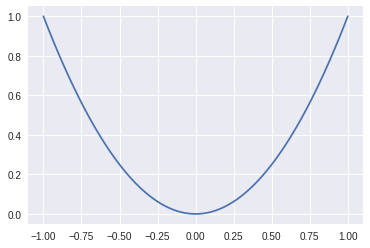

In [6]:
x = linspace(-1,1,100)
y = mySystem(x)
plot(x,y)
show()

### Use it to distort a sine wave
Generate a sine wave oscillator, $sin(2\pi f t)$

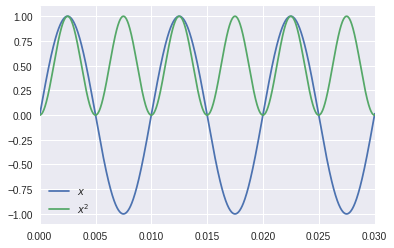

In [7]:
f = 100                  #Hz
x = sin(2*pi*f*t)        #Sine Wave

y = mySystem(x)          #calculate output
plot(t,x, label='$x$')   #plot the original signal
plot(t,y, label='$x^2$') #plot the signal
xlim([0,0.03])           #set plot to only show the first 0.03 seconds
legend()
show()

In [8]:
# input Sine wave (100 Hz is probably too low for laptop speakers. If you dont hear anything, use headphones or make 'f' higher)
Audio(data=x, rate=sr)

In [9]:
# output Sine wave
Audio(data=y, rate=sr)

### The very common $tanh$
This function is commonly used to "simulate" analog distortion in a cheap way.
$f(x)=tanh(x)$

In [10]:
def mySystem2(x):
    y = tanh(x)
    return y

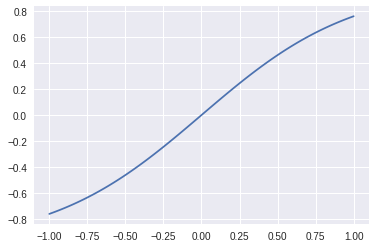

In [11]:
x = linspace(-1,1,100)
y = mySystem2(x)
plot(x,y)
show()

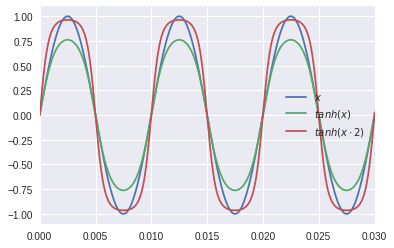

In [12]:
f = 100                  #Hz
x = sin(2*pi*f*t)        #Sine Wave

y = mySystem2(x)                #calculate output
y2 = mySystem2(x*2)           # use the same distortion, but amplify(+6dB) the input before processing.
plot(t,x, label='$x$')          #plot the original signal
plot(t,y, label='$tanh(x)$')              #plot the signal
plot(t,y2, label='$tanh(x\cdot 2)$')    #plot the signal
xlim([0,0.03])                         #set plot to only show the first 0.03 seconds

legend()
show()

In [13]:
# tanh(Sine wave)
Audio(data=y, rate=sr)

In [14]:
# tanh(Sine wave * 2)
Audio(data=y2, rate=sr)

### Plotting the frequency Spectrum via FFT

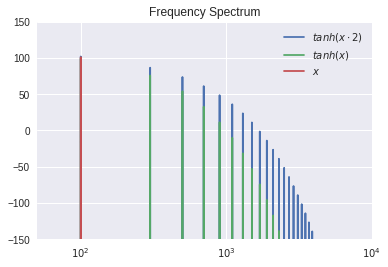

In [15]:
freqAxis = linspace(0,int(sr/2), int(N/2))
semilogx(freqAxis, 20*log10(abs(fft.fft(y2)[0:int(N/2)])), label='$tanh(x\cdot 2)$')
semilogx(freqAxis, 20*log10(abs(fft.fft(y)[0:int(N/2)])), label='$tanh(x)$')
semilogx(freqAxis, 20*log10(abs(fft.fft(x)[0:int(N/2)])), label='$x$')

ylim([-150,150]) #dB
xlim([50,10000]) #Hz
title('Frequency Spectrum')
legend()
show()